In [18]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import pandas as pd #this is how I usually import pandas
import numpy as np
#import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

zip --> dataset --> to_csv('имя')

In [4]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

baby_dataset = list(zip(names, births))
baby_dataset

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In [5]:
df = pd.DataFrame(data=baby_dataset,columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [6]:
df.to_csv('births1.csv', index=False, header=False)

In [7]:
df = pd.read_csv('births1.csv', names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


In [10]:
sorted = df.sort_values('Births', ascending=False)
sorted

,Names,Births
4,Mel,973
0,Bob,968
3,John,578
1,Jessica,155
2,Mary,77


In [11]:
sorted.head(1)

,Names,Births
4,Mel,973


In [13]:
max_value = df['Births'].max()
max_value

973

Визуализация

AttributeError: Line2D.set() got an unexpected keyword argument 'max_value'

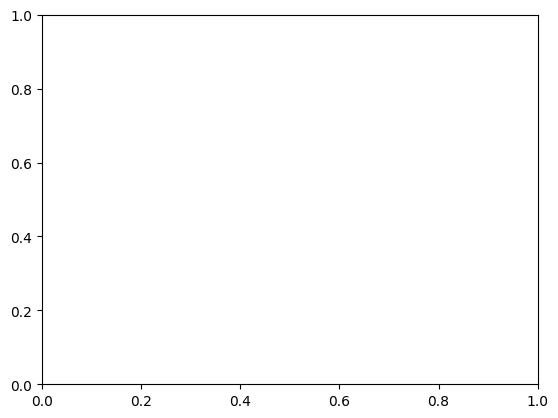

In [29]:
df['Births'].plot(max_value=973)
x = np.max(df['Births'])


In [30]:
df[df['Births'] == df['Births'].max()]

,Names,Births
4,Mel,973


In [38]:
names = ['Bob','Jessica','Mary','John','Mel']
random_names = [names[np.random.randint(low=0, high=len(names))] for i in range(1000)]

In [41]:
random_births = [np.random.randint(low=0, high=len(names)) for i in range(1000)]
random_births[0:10]

[1, 4, 3, 3, 1, 1, 1, 0, 2, 3]